In [1]:
import pygame
import random
from enum import Enum
from collections import namedtuple
import time

pygame.init()
font = pygame.font.Font('arial.ttf', 25)
#font = pygame.font.SysFont('arial', 25)

class Direction(Enum):
    RIGHT = 1
    LEFT = 2
    UP = 3
    DOWN = 4
    
Point = namedtuple('Point', 'x, y')

# rgb colors
WHITE = (255, 255, 255)
RED = (200,0,0)
BLUE1 = (0, 0, 255)
BLUE2 = (0, 100, 255)
BLACK = (0,0,0)

BLOCK_SIZE = 5
SPEED = 20

class SnakeGame:
    
    def __init__(self, w=180, h=120):
        self.w = w
        self.h = h
        # init display
        self.display = pygame.display.set_mode((self.w, self.h))
        
        array3D = pygame.surfarray.array3d(self.display)
        #print(array3D.shape)
        
        pygame.display.set_caption('Snake')
        self.clock = pygame.time.Clock()
        
        # init game state
        self.direction = Direction.RIGHT
        
        self.head = Point(self.w/2, self.h/2)
        self.snake = [self.head, 
                      Point(self.head.x-BLOCK_SIZE, self.head.y),
                      Point(self.head.x-(2*BLOCK_SIZE), self.head.y)]
        
        self.score = 0
        self.food = None
        self._place_food()
        
    def _place_food(self):
        x = random.randint(0, (self.w-BLOCK_SIZE )//BLOCK_SIZE )*BLOCK_SIZE 
        y = random.randint(0, (self.h-BLOCK_SIZE )//BLOCK_SIZE )*BLOCK_SIZE
        self.food = Point(x, y)
        if self.food in self.snake:
            self._place_food()
        
    def play_step(self):
        # 1. collect user input
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_LEFT:
                    self.direction = Direction.LEFT
                elif event.key == pygame.K_RIGHT:
                    self.direction = Direction.RIGHT
                elif event.key == pygame.K_UP:
                    self.direction = Direction.UP
                elif event.key == pygame.K_DOWN:
                    self.direction = Direction.DOWN
        
        # 2. move
        self._move(self.direction) # update the head
        self.snake.insert(0, self.head)
        
        # 3. check if game over
        game_over = False
        if self._is_collision():
            game_over = True
            return game_over, self.score
            
        # 4. place new food or just move
        if self.head == self.food:
            self.score += 1
            self._place_food()
        else:
            self.snake.pop()
        
        # 5. update ui and clock
        array3D = self._update_ui()
        self.clock.tick(SPEED)
        # 6. return game over and score
        return game_over, self.score
    
    def _is_collision(self):
        # hits boundary
        if self.head.x > self.w - BLOCK_SIZE or self.head.x < 0 or self.head.y > self.h - BLOCK_SIZE or self.head.y < 0:
            return True
        # hits itself
        if self.head in self.snake[1:]:
            return True
        
        return False
        
    def _update_ui(self):
        self.display.fill(BLACK)
        
        for pt in self.snake:
            pygame.draw.rect(self.display, BLUE1, pygame.Rect(pt.x, pt.y, BLOCK_SIZE, BLOCK_SIZE))
            pygame.draw.rect(self.display, BLUE2, pygame.Rect(pt.x+1, pt.y+1, BLOCK_SIZE-2, BLOCK_SIZE-2))
            
        pygame.draw.rect(self.display, RED, pygame.Rect(self.food.x, self.food.y, BLOCK_SIZE, BLOCK_SIZE))
        
        text = font.render("Score: " + str(self.score), True, WHITE)
        self.display.blit(text, [0, 0])
        
        array3D = pygame.surfarray.array3d(self.display)
        print(array3D.shape)
        pygame.display.flip()
        
        return array3D
        
    def _move(self, direction):
        x = self.head.x
        y = self.head.y
        if direction == Direction.RIGHT:
            x += BLOCK_SIZE
        elif direction == Direction.LEFT:
            x -= BLOCK_SIZE
        elif direction == Direction.DOWN:
            y += BLOCK_SIZE
        elif direction == Direction.UP:
            y -= BLOCK_SIZE
            
        self.head = Point(x, y)
            


pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:

if __name__ == '__main__':
    game = SnakeGame()
    
   

In [2]:

game = SnakeGame()
#game.reset
while True:
    game_over, score = game.play_step()
    array3D = game._update_ui()
    time.sleep(0.1)
    if game_over == True:
        break

print('Final Score', score)
pygame.display.quit() 
pygame.quit()

(180, 120, 3)
(180, 120, 3)
(180, 120, 3)
(180, 120, 3)
(180, 120, 3)
(180, 120, 3)
(180, 120, 3)
(180, 120, 3)
(180, 120, 3)
(180, 120, 3)
(180, 120, 3)
(180, 120, 3)
(180, 120, 3)
(180, 120, 3)
(180, 120, 3)
Final Score 0


In [3]:
pygame.display.quit() 

pygame.quit()

(160, 210, 3)
(210, 160, 3)


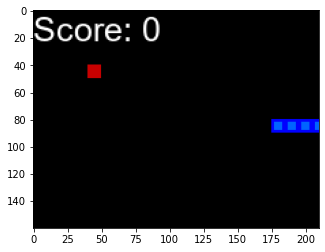

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

array3D
v = np.transpose(array3D, (1,0,2))
print(v.shape)
print(array3D.shape)
plt.imshow(v)

In [6]:
game.reset
print(dir(game))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_is_collision', '_move', '_place_food', '_update_ui', 'clock', 'direction', 'display', 'food', 'h', 'head', 'play_step', 'reset', 'score', 'snake', 'w']
